<a href="https://colab.research.google.com/github/melnikovknst/COOKIE_2024/blob/Furie/WindowFurie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Преобразования фурье

In [9]:
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
import librosa.display

def apply_stft_to_numpy_file(file_path, n_fft=512, hop_length=256):
    # Загружаем numpy файл (предположим, что это одномерный массив)
    data = np.fromfile(file_path, dtype=np.float64)

    # Выводим форму данных для диагностики
    print(f"Форма загруженных данных: {data.shape}")

    # Преобразуем данные в тип с плавающей запятой (например, float32)


    # Получаем количество каналов и длину данных в одном канале
    num_channels = 4  # У нас 4 канала


    # Разбиваем данные на 4 канала
    data_split = np.split(data, num_channels)

    # Проверим, что данные разбились корректно
    print(f"Данные после разбиения: {[channel.shape for channel in data_split]}")

    # Создаем пустой массив для хранения результатов STFT
    stft_data = []

    # Применяем STFT для каждого канала
    for channel_idx in range(num_channels):
        channel_data = data_split[channel_idx]

        # Применяем STFT для канала (используем librosa для правильной работы с окнами и сдвигами)
        stft_result = librosa.stft(channel_data, n_fft=n_fft, hop_length=hop_length)

        # Получаем амплитуду (модуль спектра) для каждого канала
        stft_data.append(np.abs(stft_result))  # Добавляем результат для канала

    # Конвертируем список в numpy массив
    stft_data = np.array(stft_data)

    # Получаем имя файла без расширения
    base_name = os.path.splitext(os.path.basename(file_path))[0]

    # Формируем путь для сохранения нового numpy файла в нужное расположение
    output_path = f"/content/drive/MyDrive/Colab Notebooks/{base_name}_stft.npy"

    # Сохраняем данные в файл .npy
    np.save(output_path, {
        'stft_data': stft_data
    })

    print(f"Данные сохранены в файл: {output_path}")

# Пример использования:
file_path = '/content/drive/MyDrive/Colab Notebooks/2024-06-01 14-34-10.npy'  # Замените на путь к вашему numpy файлу

apply_stft_to_numpy_file(file_path)


Форма загруженных данных: (512000,)
Данные после разбиения: [(128000,), (128000,), (128000,), (128000,)]
Данные сохранены в файл: /content/drive/MyDrive/Colab Notebooks/2024-06-01 14-34-10_stft.npy


In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt

def apply_stft_to_numpy_file(file_path, n_fft=512, hop_length=256):
    # Загружаем numpy файл (предположим, что это одномерный массив)

    data = np.fromfile(file_path, dtype=np.float64)

    # Выводим форму данных для диагностики
    print(f"Форма загруженных данных: {data.shape}")



    # Получаем количество каналов и длину данных в одном канале
    num_channels = 4  # У нас 4 канала


    # Разбиваем данные на 4 канала
    data_split = np.split(data, num_channels)

    # Проверим, что данные разбились корректно
    print(f"Данные после разбиения: {[channel.shape for channel in data_split]}")

    # Создаем пустой список для хранения результатов STFT
    stft_data = []

    # Применяем rfft для каждого канала
    for channel_idx in range(num_channels):
        channel_data = data_split[channel_idx]

        # Рассчитываем количество фреймов, которое будет полным
        num_frames = (len(channel_data) - n_fft) // hop_length + 1

        stft_channel = []

        for i in range(num_frames):
            start_idx = i * hop_length
            end_idx = start_idx + n_fft
            frame_data = channel_data[start_idx:end_idx]

            # Применяем rfft (реальное преобразование Фурье)
            filtered_spectr = np.fft.rfft(frame_data)

            stft_channel.append(np.abs(filtered_spectr))  # Модуль спектра

        # Конвертируем список в numpy массив
        stft_data.append(np.array(stft_channel))

    # Конвертируем список в numpy массив для всех каналов
    stft_data = np.array(stft_data)

    # Получаем имя файла без расширения
    base_name = os.path.splitext(os.path.basename(file_path))[0]

    # Формируем путь для сохранения нового numpy файла в нужное расположение
    output_path = f"/content/drive/MyDrive/Colab Notebooks/{base_name}_rfft.npy"

    # Сохраняем данные в файл .npy
    np.save(output_path, {
        'stft_data': stft_data
    })

    print(f"Данные сохранены в файл: {output_path}")

# Пример использования:
file_path = '/content/drive/MyDrive/Colab Notebooks/2024-06-01 14-34-10.npy'  # Замените на путь к вашему numpy файлу
apply_stft_to_numpy_file(file_path)


Форма загруженных данных: (512000,)
Данные после разбиения: [(128000,), (128000,), (128000,), (128000,)]
Данные сохранены в файл: /content/drive/MyDrive/Colab Notebooks/2024-06-01 14-34-10_rfft.npy


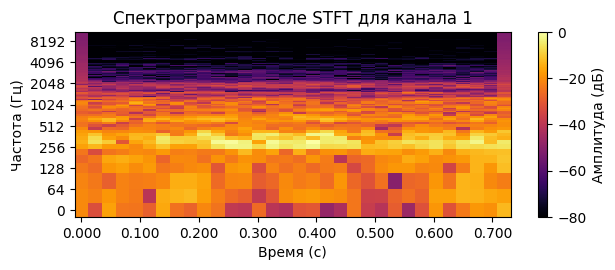

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display

def plot_spectrograms(file_path, n_fft=512, hop_length=256):
    # Загружаем данные из numpy файла
    data = np.load(file_path)

    # Преобразуем данные в тип с плавающей запятой
    data = data.astype(np.float32)

    # Убедимся, что данные можно разделить на 4 канала
    num_channels = 4
    if len(data) % num_channels != 0:
        print("Ошибка: данные не делятся на 4 канала.")
        return

    # Разделяем данные на 4 канала
    data_split = np.split(data, num_channels)

    # Применяем STFT для каждого канала
    stft_data = []
    for channel_data in data_split:
        stft_result = librosa.stft(channel_data, n_fft=n_fft, hop_length=hop_length)
        stft_data.append(np.abs(stft_result))  # Амплитуда STFT

    stft_data = np.array(stft_data)



    # Отображаем спектрограмму для первого канала после STFT
    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(stft_data[0], ref=np.max), y_axis='log', x_axis='time', cmap='inferno')
    plt.colorbar(label='Амплитуда (дБ)')
    plt.title('Спектрограмма после STFT для канала 1')
    plt.xlabel('Время (с)')
    plt.ylabel('Частота (Гц)')

    plt.tight_layout()
    plt.show()

# Пример использования:
file_path = '/content/drive/MyDrive/Colab Notebooks/2024_6_1 17_12_29.npy'  # Путь к вашему numpy файлу
plot_spectrograms(file_path)


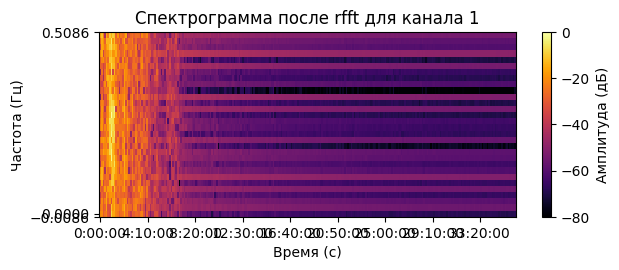

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display

def plot_spectrograms(file_path, n_fft=512, hop_length=256):
    # Загружаем данные из numpy файла
    data = np.load(file_path)

    # Преобразуем данные в тип с плавающей запятой
    data = data.astype(np.float32)

    # Убедимся, что данные можно разделить на 4 канала
    num_channels = 4
    if len(data) % num_channels != 0:
        print("Ошибка: данные не делятся на 4 канала.")
        return

    # Разделяем данные на 4 канала
    data_split = np.split(data, num_channels)

    # Применяем STFT для каждого канала
    stft_data = []
    for channel_data in data_split:
        # Рассчитываем количество фреймов
        num_frames = (len(channel_data) - n_fft) // hop_length + 1
        channel_stft = []

        # Применяем rfft для каждого фрейма
        for i in range(num_frames):
            start_idx = i * hop_length
            end_idx = start_idx + n_fft
            frame_data = channel_data[start_idx:end_idx]

            # Применяем rfft (реальное преобразование Фурье)
            filtered_spectr = np.fft.rfft(frame_data)
            channel_stft.append(np.abs(filtered_spectr))  # Модуль спектра

        # Преобразуем список в двумерный массив (время x частотные бины)
        stft_data.append(np.array(channel_stft))

    # Конвертируем список в numpy массив для всех каналов
    stft_data = np.array(stft_data)



    # Отображаем спектрограмму для первого канала после rfft
    plt.subplot(2, 1, 2)
    # Используем данные из stft_data для первого канала
    stft_channel_1 = stft_data[0]  # Для первого канала
    stft_channel_1_db = librosa.amplitude_to_db(stft_channel_1, ref=np.max)
    librosa.display.specshow(stft_channel_1_db, sr=1, x_axis='time', y_axis='log', cmap='inferno')
    plt.colorbar(label='Амплитуда (дБ)')
    plt.title('Спектрограмма после rfft для канала 1')
    plt.xlabel('Время (с)')
    plt.ylabel('Частота (Гц)')

    plt.tight_layout()
    plt.show()

# Пример использования:
file_path = '/content/drive/MyDrive/Colab Notebooks/2024_6_1 17_12_29.npy'  # Путь к вашему numpy файлу
plot_spectrograms(file_path)
